IMPORTING NECESSARY PACKAGES AND MODULES

In [1]:
import pandas as pd
from data_exploration import *
from data_preprocess import *
from evaluation import *
from decision_tree import *

READING THE CSV FILE

In [2]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


CHECKING NUMBER OF (ROWS,COLUMNS) TO KNOW HOW LARGE IS DATA

In [3]:
view(df)

rows:4898 columns:13


# Data preprocessing and exploration

CHECKING FOR NULL AND MISSING VALUES FOR DATA PREPPROCESSING(NO NULL VALUES)

In [4]:
check_null(df) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.1 KB


CHECKING FOR DATA REDUNDANCY(DUPLICATE ROWS)

In [5]:
dupli_rows(df)

number of duplicate rows:937 


REMOVING DUPLICATE ROWS

In [6]:
remove_dupli(df)
view(df)

rows:3961 columns:13


FREQUENCY OF EACH QUALITY LEVEL TO CHECK WHICH PREDOMINATES

In [7]:
data1_df = frequency(df,df.quality,"Quality Level")
data1_df

,Quality Level,Frequency
0,3,20
1,4,153
2,5,1175
3,6,1788
4,7,689
5,8,131
6,9,5


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION

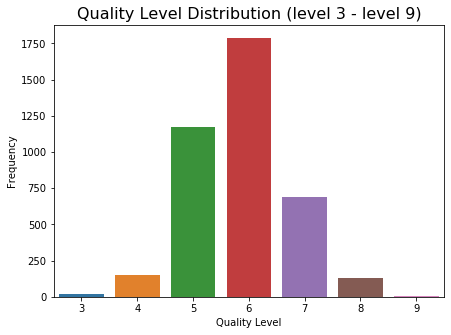

In [8]:
graph(data1_df,"Quality Level","Frequency","Quality Level Distribution (level 3 - level 9)")

HEATMAP FOR DATA VISUALIZATION  (color value of the cells is proportional to the number of measurements that match the dimensional value)

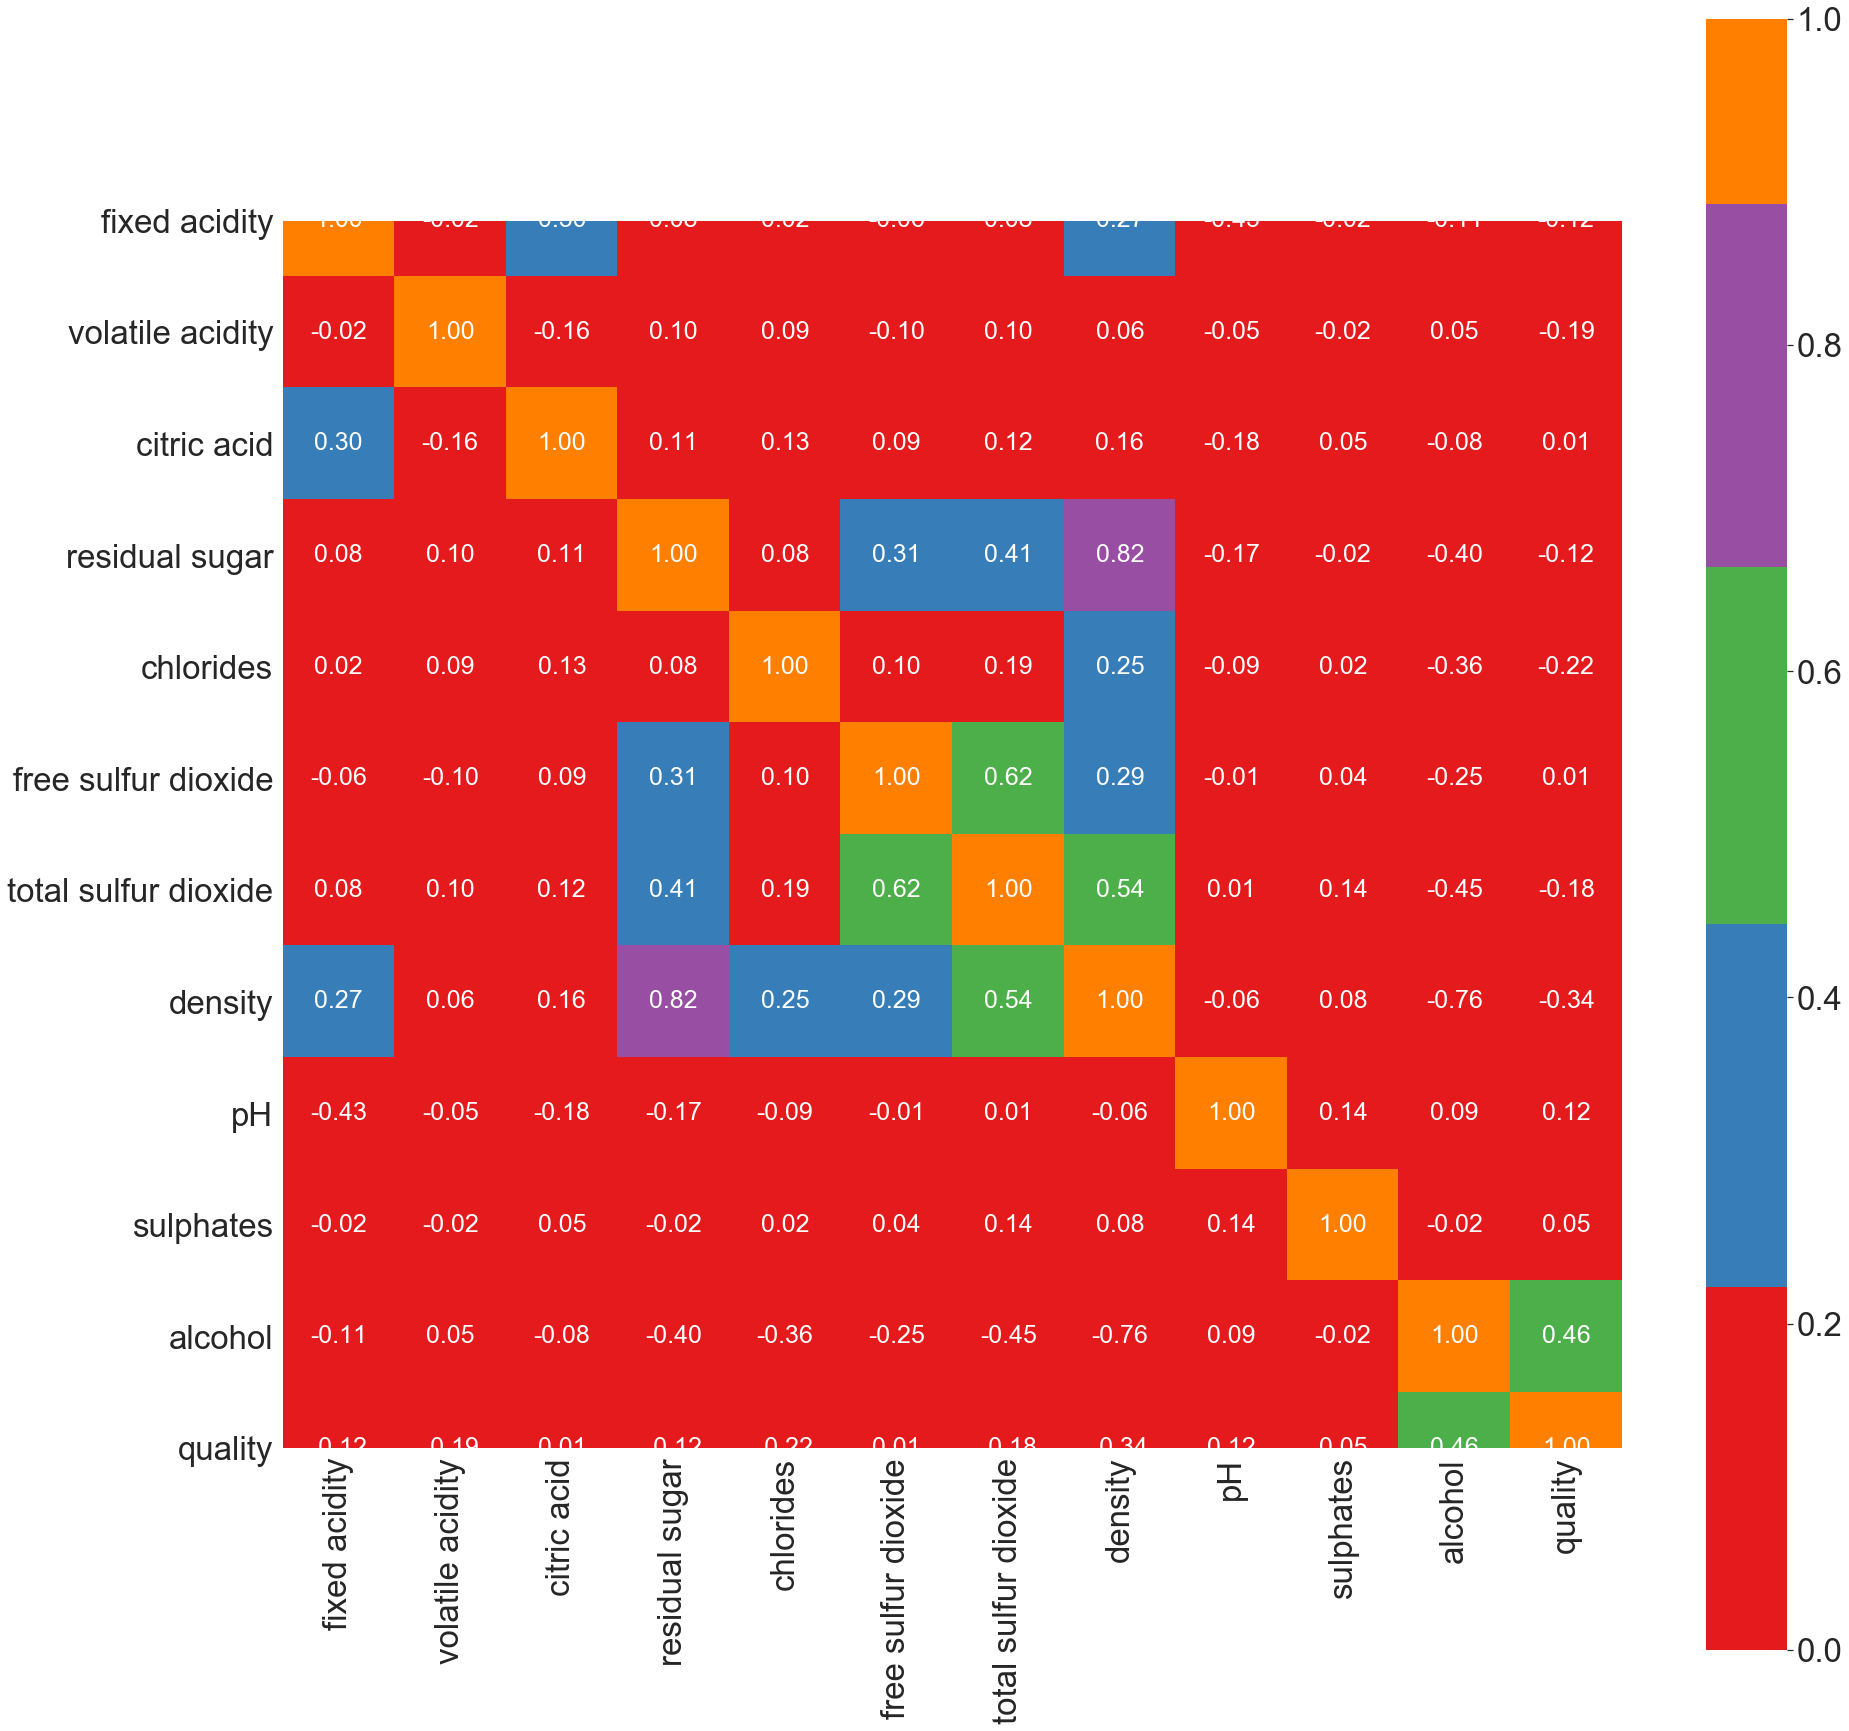

In [9]:
heat_map(df)

# data exploration and preprocessing for binary classification

FREQUENCY OF EACH QUALITY LABEL (recommend-target variable for binary classification)

In [10]:
data2_df = frequency(df,df.recommend,'Quality Label')
data2_df

,Quality Label,Frequency
0,False,3136
1,True,825


BAR CHART SHOWING QUALITY LABEL DISTRIBUTION

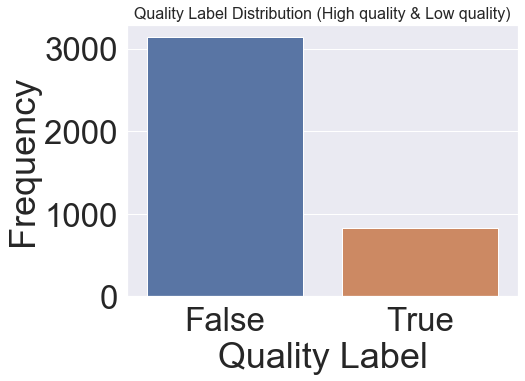

In [11]:
graph(data2_df,"Quality Label","Frequency","Quality Label Distribution (High quality & Low quality)")

USING CORRELATION COEFF. TO FIND CORRELATION BETWEEN VARIOUS FEATURES WITH TARGET VARIABLE

In [12]:
correlate_binary(df)

fixed acidity           0.087803
volatile acidity        0.057399
citric acid             0.022618
residual sugar          0.138099
chlorides               0.189573
free sulfur dioxide     0.022655
total sulfur dioxide    0.180551
density                 0.315023
pH                      0.116922
sulphates               0.043327
alcohol                 0.416573
quality                 0.757969
recommend               1.000000
Name: recommend, dtype: float64

PREPROCESSING RECOMMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [13]:
process_binary(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# modelling for binary classification

features-LIST WITH DEPENDENT VARIABLES 
target1-target variable for binary classification
target2-target variable for multi-class classification

In [14]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']
target2 = ['level']

SPLITTING IN TRANING AND TESTING SET(20%-testing set)

In [15]:
x = df[features]
y1 = df[target1].values.ravel()
X_train, X_test, y_train, y_test = data_split(x,y1,0.20)

decision tree classification using gini index criteria for feature importance selection and its evaluation

In [16]:
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using gini index(binary classification) is:  78.43631778058008

classification report:               precision    recall  f1-score   support

       False       0.83      0.91      0.87       618
        True       0.52      0.35      0.42       175

    accuracy                           0.78       793
   macro avg       0.67      0.63      0.64       793
weighted avg       0.76      0.78      0.77       793


confusion matrix: [[561  57]
 [114  61]]


AUC-AREA UNDER THE ROC CURVE
AUC of 0.5 suggests no discrimination
0.7 to 0.8 is considered acceptable
0.8 to 0.9 is considered excellent
and more than 0.9 is considered outstanding

ROC CURVE -RECEIVER OPERATING CHARACTERISTICS CURVE
It llustrates the diagnostic ability of a binary classifier system


Area Under the Receiver Operating Characteristics: 0.6281692094313454


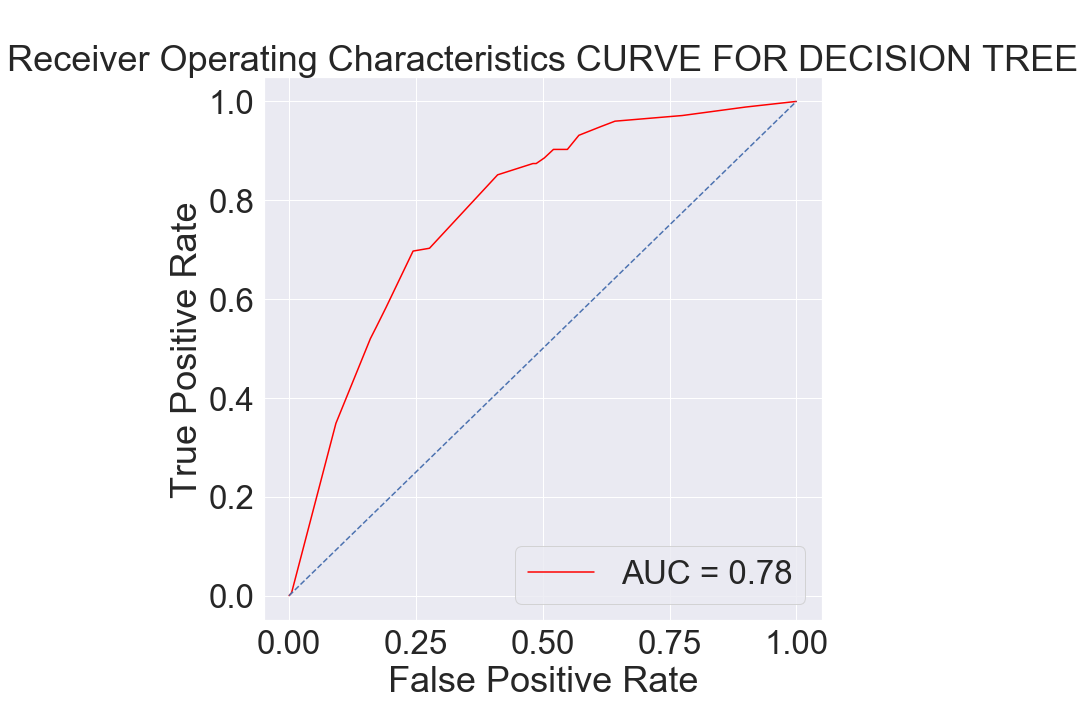

In [17]:
auc_roc,roc_auc,false_positive_rate, true_positive_rate = curve(y_test,y_pred,y_prob)
print("\nArea Under the Receiver Operating Characteristics:",auc_roc)
curve_plot("\nReceiver Operating Characteristics CURVE FOR DECISION TREE" ,roc_auc,false_positive_rate, true_positive_rate)

decision tree classification using entropy criteria for feature importance selection and its evaluation


In [18]:
y_pred,y_prob = tree_model_entropy(X_test,X_train,y_train)
print( "Accuracy of decision tree using entropy(binary classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using entropy(binary classification) is:  79.8234552332913

classification report:               precision    recall  f1-score   support

       False       0.83      0.93      0.88       618
        True       0.57      0.33      0.42       175

    accuracy                           0.80       793
   macro avg       0.70      0.63      0.65       793
weighted avg       0.77      0.80      0.78       793


confusion matrix: [[575  43]
 [117  58]]


AUC-AREA UNDER THE ROC CURVE
AUC of 0.5 suggests no discrimination
0.7 to 0.8 is considered acceptable
0.8 to 0.9 is considered excellent
and more than 0.9 is considered outstanding

ROC CURVE -RECEIVER OPERATING CHARACTERISTICS CURVE
It llustrates the diagnostic ability of a binary classifier system


Area Under the Receiver Operating Characteristics: 0.6309246417013408


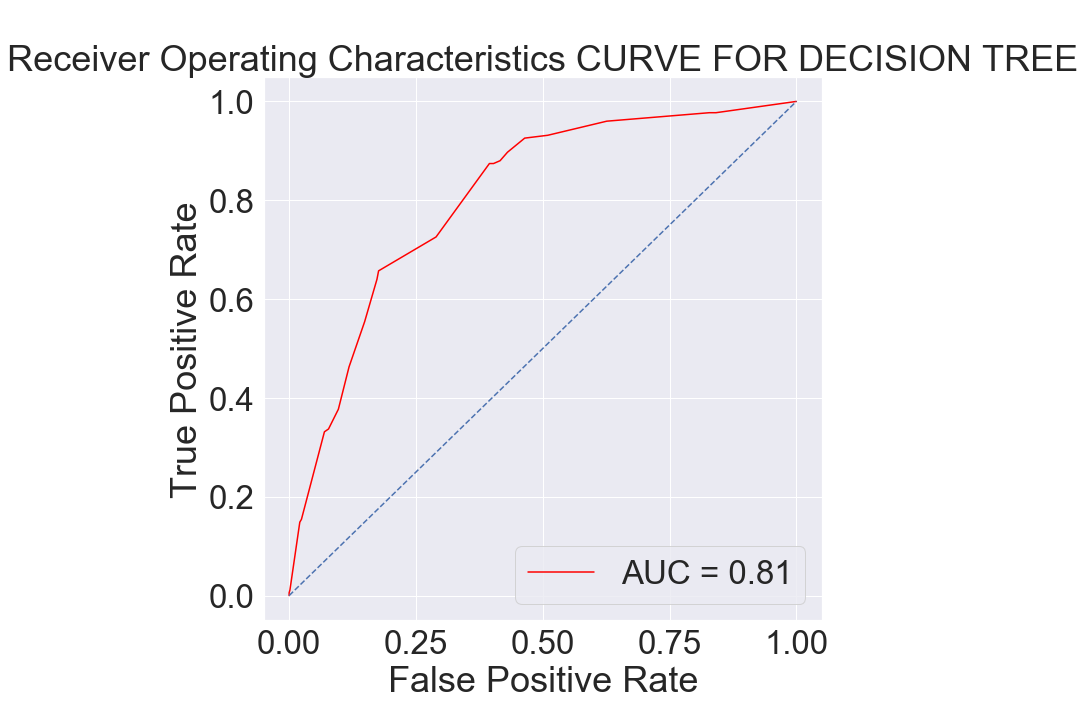

In [20]:
auc_roc,roc_auc,false_positive_rate, true_positive_rate = curve(y_test,y_pred,y_prob)
print("\nArea Under the Receiver Operating Characteristics:",auc_roc)
curve_plot("\nReceiver Operating Characteristics CURVE FOR DECISION TREE" ,roc_auc,false_positive_rate, true_positive_rate)

# data exploration and preprocessing for multi-class classification

ADDING NEW COLUMN LEVEL(quality <=4 - level 3,quality between (4,6] - level 2 , otherwise level 1) FOR MULTI-CLASS CLASSIFICATION

In [21]:
process_multi(df,df.quality) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend,level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,2
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False,2


FREQUENCY OF EACH QUALITY LEVEL(level - target variable )

In [22]:
data3_df = frequency(df,df.level,"Quality Level")
data3_df

,Quality Level,Frequency
0,1,825
1,2,2963
2,3,173


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION

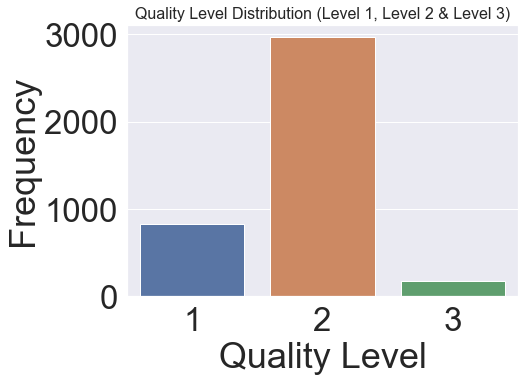

In [23]:
graph(data3_df,"Quality Level","Frequency","Quality Level Distribution (Level 1, Level 2 & Level 3)")

USING CORRELATION COEFF. TO FIND CORRELATION BETWEEN VARIOUS FEATURES WITH TARGET VARIABLE

In [24]:
correlate_multi(df)

fixed acidity           0.112778
volatile acidity        0.134616
citric acid             0.000151
residual sugar          0.095588
chlorides               0.180858
free sulfur dioxide     0.024868
total sulfur dioxide    0.138183
density                 0.285255
pH                      0.106079
sulphates               0.048410
alcohol                 0.385087
quality                 0.852876
level                   1.000000
Name: level, dtype: float64

# modelling for multi-class classification

SPLITTING IN TRANING AND TESTING SET(20%-testing set)

In [25]:
y2=df[target2].values.ravel()
X_train, X_test, y_train, y_test = data_split( x, y2,0.20)

decision tree classification using gini index criteria for feature importance selection and its evaluation

In [26]:
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train)
print( "Accuracy of decision tree using gini index(multi classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using gini index(multi classification) is:  75.28373266078184

classification report:               precision    recall  f1-score   support

           1       0.63      0.21      0.31       175
           2       0.77      0.96      0.85       583
           3       0.00      0.00      0.00        35

    accuracy                           0.75       793
   macro avg       0.47      0.39      0.39       793
weighted avg       0.70      0.75      0.70       793


confusion matrix: [[ 36 138   1]
 [ 20 561   2]
 [  1  34   0]]


decision tree classification using entropy criteria for feature importance selection and its evaluation

In [27]:
y_pred,y_prob = tree_model_entropy(X_test,X_train,y_train)
print( "Accuracy of decision tree using entropy(multi classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using entropy(multi classification) is:  74.6532156368222

classification report:               precision    recall  f1-score   support

           1       0.61      0.17      0.27       175
           2       0.76      0.96      0.85       583
           3       0.22      0.06      0.09        35

    accuracy                           0.75       793
   macro avg       0.53      0.40      0.40       793
weighted avg       0.71      0.75      0.69       793


confusion matrix: [[ 30 144   1]
 [ 17 560   6]
 [  2  31   2]]
